In [ ]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
train=pd.read_csv('train.csv')
del train['id']

In [ ]:
train.head(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


In [ ]:
train.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

There are 3 categorical variables.

##Data Visualization

In [ ]:
train.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

To check the quality of the dataset, lets see if any of the non-categorical columns have unreal values.

In [ ]:
train.describe(percentiles=[0.25,0.5,0.75,0.99])

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
99%,77.000000,1.000000,50.000000,1.000000,72963.000000,160.000000,297.000000,1.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Driving License, Region_code, previously insured,policy sales channel are actually categorical variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


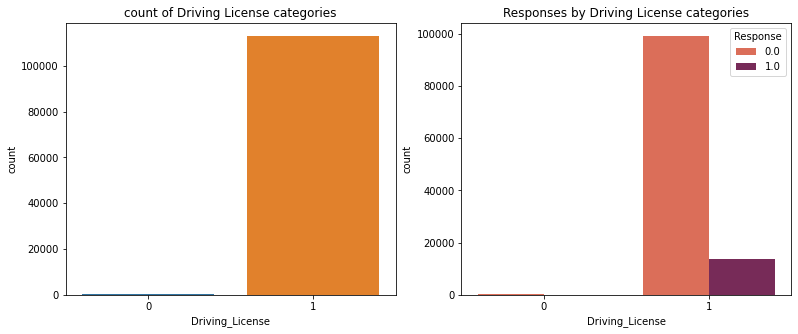

In [ ]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(train['Driving_License'])
plt.title("count of Driving License categories")
plt.subplot(1,2,2)
sns.countplot(train['Driving_License'], hue = train['Response'],palette="rocket_r")
plt.title("Responses by Driving License categories")
plt.show()

When plotting driving license by response, its clear that we don't have a lot of customers without a DL. This may or may not be a bad indicator

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Region Representation in the data')

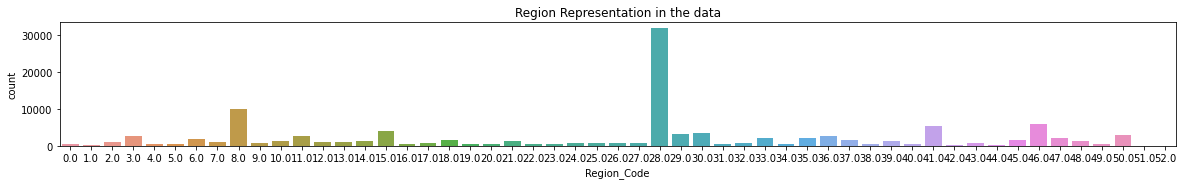

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(2,1,1)
sns.countplot(train['Region_Code'])
plt.title("Region Representation in the data")


We can see here that some regions are more dominantly represented in the training data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


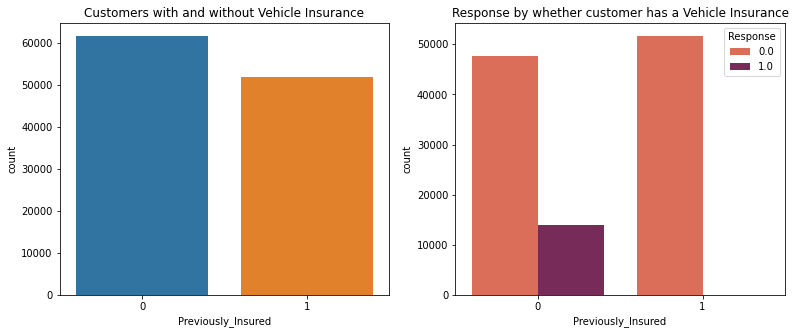

In [ ]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(train['Previously_Insured'])
plt.title("Customers with and without Vehicle Insurance")
plt.subplot(1,2,2)
sns.countplot(train['Previously_Insured'], hue = train['Response'],palette="rocket_r")
plt.title("Response by whether customer has a Vehicle Insurance")
plt.show()

As expected, customers who already have vehicle insurance are not willing to buy another. This could be an important variable.

Age: max of 85 and min of 20 make sense. However, we should check if the age of people is random or is there a dominant age group

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Age distribution for customers who responded yes')

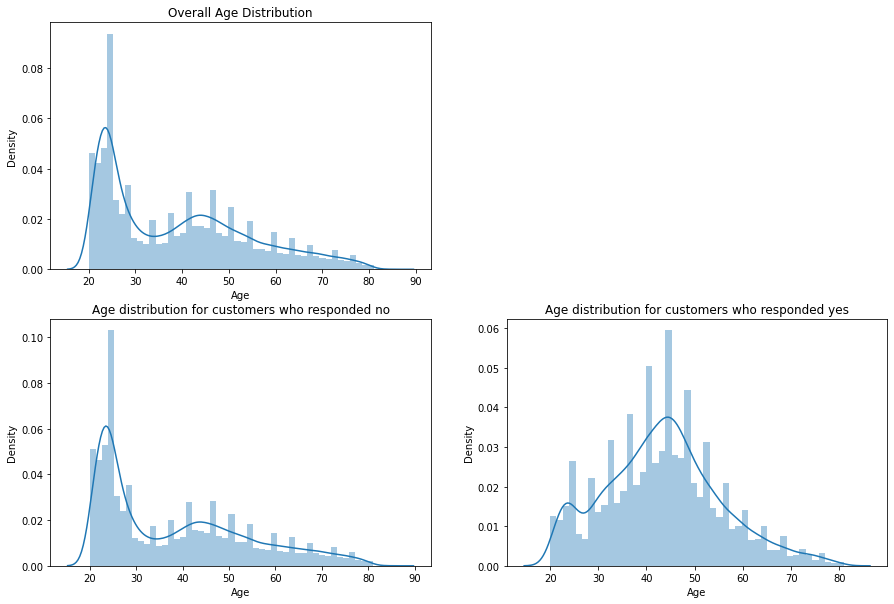

In [ ]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.distplot(train['Age'])
plt.title("Overall Age Distribution")
plt.subplot(2,2,3)
sns.distplot(train[train['Response']==0]['Age'])
plt.title("Age distribution for customers who responded no")
plt.subplot(2,2,4)
sns.distplot(train[train['Response']==1]['Age'])
plt.title("Age distribution for customers who responded yes")

We see there are more people in the age group of 20-30 than 40-50 in the overall training data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Distribution for customers who responded yes')

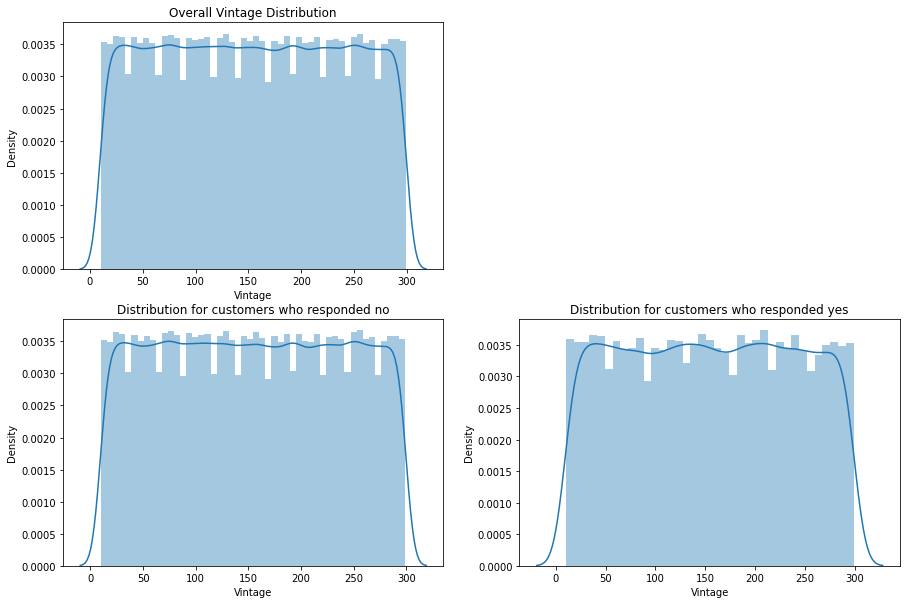

In [ ]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.distplot(train['Vintage'])
plt.title("Overall Vintage Distribution")
plt.subplot(2,2,3)
sns.distplot(train[train['Response']==0]['Vintage'])
plt.title("Distribution for customers who responded no")
plt.subplot(2,2,4)
sns.distplot(train[train['Response']==1]['Vintage'])
plt.title("Distribution for customers who responded yes")

Here, we see that the distribution for the variable Vintage does not change overall and for different response variables.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


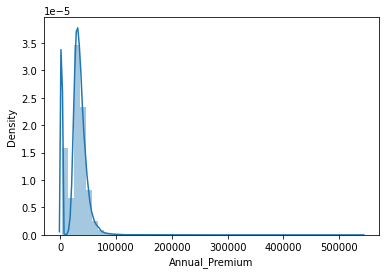

In [ ]:
sns.distplot(train['Annual_Premium'])

The above graph and the describe suggests that there are outliers in this variable. To remove variables, we can use the 1.5iqr rule.

##Data Preprocessing

In [ ]:
##Scaling down Age
max_age=max(train.Age)
min_age=min(train.Age)
train.Age=train.Age.apply(lambda x: (x-min_age)/(max_age-min_age))
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,0.369231,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,0.861538,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,0.415385,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,0.015385,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,0.138462,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,0.830769,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,0.153846,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,0.015385,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,0.738462,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [ ]:
#Sacling down Annual Premimum
max_premium=max(train.Annual_Premium)
min_premium=min(train.Annual_Premium)
train.Annual_Premium=train.Annual_Premium.apply(lambda x: (x-min_premium)/(max_premium-min_premium))

In [ ]:
train.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [ ]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
X = train.iloc[:,:10]
y = train.iloc[:,10]
category_cols=['Gender','Vehicle_Damage','Vehicle_Age']
for col in category_cols:
    le = preprocessing.LabelEncoder()
    X[col]=le.fit_transform(X[col])


In [ ]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
X_smote,y_smote=oversample.fit_resample(X,y)

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X_smote,y_smote,test_size=.1,random_state=42)

In [ ]:
from xgboost import XGBClassifier
classifier5=XGBClassifier()
classifier5.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
pred_train_y = classifier5.predict(test_x)
print('Classification report of test data \n',classification_report(test_y,pred_train_y))
##Good results

Classification report of test data 
               precision    recall  f1-score   support

           0       0.93      0.76      0.83     33287
           1       0.80      0.94      0.86     33593

    accuracy                           0.85     66880
   macro avg       0.86      0.85      0.85     66880
weighted avg       0.86      0.85      0.85     66880



In [ ]:
q3 =train['Annual_Premium'].quantile(0.75)
q1=train['Annual_Premium'].quantile(0.25)

In [ ]:
iqr=q3-q1

upper_boundary=q3+(1.5*iqr)
lower_boundary=q1-(1.5*iqr)

In [ ]:
train_new=train[train['Annual_Premium']>=lower_boundary]
train_new=train_new[train_new['Annual_Premium']<=upper_boundary]

In [ ]:
y=train_new['Response']
X=train_new.loc[:, train_new.columns != 'Response']

In [ ]:
X

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,2,1,40454.0,26.0,217.0
1,1,76,1,3.0,0,0,0,33536.0,26.0,183.0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27.0
3,1,21,1,11.0,1,1,0,28619.0,152.0,203.0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39.0
...,...,...,...,...,...,...,...,...,...,...
113247,1,21,1,9.0,1,1,0,38584.0,160.0,64.0
113248,0,43,1,28.0,0,0,1,30241.0,124.0,219.0
113249,0,61,1,28.0,0,0,1,49766.0,26.0,164.0
113250,0,22,1,16.0,1,1,1,31302.0,152.0,96.0


In [ ]:
#Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [ ]:
#Ref https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
#Handling data imbalance using SMOTE:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X_train, y_train)

In [ ]:
!pip3 install catboost

     |████████████████████████████████| 67.3MB 79kB/s 


In [ ]:
#Catboost
#the best parameters were found by using cross validation
from catboost import CatBoostClassifier
cat_clf = CatBoostClassifier( iterations = 30000, 
                                random_seed = 42, 
#                                 task_type = 'GPU',
                                task_type = 'CPU',
                                learning_rate=0.15,
                                random_strength=0.1,
                                depth=8,
                                loss_function='Logloss',
                                eval_metric='Logloss',
                                leaf_estimation_method='Newton',
                                subsample = 0.9,
                                rsm = 0.8,
                                custom_loss = ['AUC'] )
cat_clf.fit(X_sm,y_sm)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(criterion= 'entropy',
               max_depth= 6,
               min_samples_leaf= 6,
               min_samples_split= 7,
               n_estimators= 300,
                            class_weight='balanced')
clf.fit(X_sm,y_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#LGBM


In [ ]:
#evaluate model 
from sklearn.metrics import classification_report,auc,roc_curve
def plot_feature_imp():
    feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
    feat_importances.plot(kind='barh')



def evaluate_model(model):
    
    y_pred=model.predict(X_test)
    print(classification_report(y_test, y_pred))
    y_score = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    print ('Area under curve (AUC): ', auc(fpr,tpr))
    

In [ ]:
#evaluate catboost
evaluate_model(cat_clf)
#precision and recall both are low. try catboost with 30000

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     81409
           1       0.42      0.06      0.11     11289

    accuracy                           0.88     92698
   macro avg       0.65      0.53      0.52     92698
weighted avg       0.83      0.88      0.83     92698

Area under curve (AUC):  0.8506811787839332


In [ ]:
#evaluate rf
evaluate_model(clf)
#takeways:
#precision is low, recall is high

              precision    recall  f1-score   support

           0       0.97      0.71      0.82     81409
           1       0.29      0.85      0.44     11289

    accuracy                           0.73     92698
   macro avg       0.63      0.78      0.63     92698
weighted avg       0.89      0.73      0.78     92698

Area under curve (AUC):  0.8387328164977965


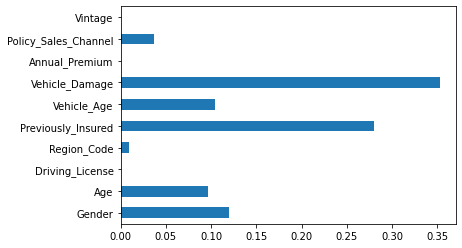

In [ ]:
#feature imp - similar to data exp
plot_feature_imp()

In [ ]:
from xgboost import XGBClassifier
XGB_model= XGBClassifier(random_state = 42, max_depth = 8, 
                            n_estimators = 10000, 
                            reg_lambda = 1.2, reg_alpha = 1.2, 
                            min_child_weight = 1, 
                            objective = 'binary:logistic',
                            learning_rate = 0.15, gamma = 0.3, colsample_bytree = 0.5, eval_metric = 'auc')

xgb_clf=XGB_model.fit(X_train, y_train,verbose=2)

In [ ]:
evaluate_model(xgb_clf)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     81409
           1       0.35      0.19      0.24     11289

    accuracy                           0.86     92698
   macro avg       0.62      0.57      0.58     92698
weighted avg       0.83      0.86      0.84     92698

Area under curve (AUC):  0.8313846908484386


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from scipy.stats import randint
import pickle
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

In [ ]:
filename = 'rf_model.sav'
pickle.dump(XGB_model, open(filename, 'wb'))

In [ ]:
rf_load = pickle.load(open(filename, 'rb'))

In [ ]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 1000, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train,y_train)

Fitting 4 folds for each of 126 candidates, totalling 504 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 504 out of 504 | elapsed: 26.7min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
evaluate_model(c)

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93     24192
         1.0       0.00      0.00      0.00      3376

    accuracy                           0.88     27568
   macro avg       0.44      0.50      0.47     27568
weighted avg       0.77      0.88      0.82     27568

Area under curve (AUC):  0.827756184136701


In [ ]:
y_pred=model.predict(x_test)